## Paso 1: Instalar las dependencias y configurar el proyecto en GPU


In [6]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -


"sudo" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [9]:
!apt-get update & apt-get install tensorflow-model-server



"apt-get" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"apt-get" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [4]:
!pip install tensorflow==1.13.1

  Using cached https://files.pythonhosted.org/packages/bf/58/34bfa8fa17f86333361172b3b502e805195180f19a7496ad0f6149138d55/tensorflow-1.13.1-cp36-cp36m-win_amd64.whl
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0
ERROR: tensorflow-serving-api 1.14.0 has requirement tensorflow~=1.14.0, but you'll have tensorflow 1.13.1 which is incompatible.


In [5]:
!pip install requests

## Paso 2: Importar las dependencias del proyecto

In [11]:
import os
import json
import random
import requests
import subprocess
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'1.13.1'

In [0]:
MODEL_DIR = "model/"
version = 1

In [0]:
export_path = os.path.join(MODEL_DIR, str(version))
export_path

'model/1'

### Exportar el MODEL_DIR a las variables de entorno

In [0]:
os.environ['MODEL_DIR'] = os.path.abspath(MODEL_DIR)

### Ejecutar la API REST de TensorFlow Serving

In [0]:
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8000 --model_name=cifar10 --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 3 in a separate thread.


In [0]:
!tail server.log

2019-08-07 10:08:17.405940: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:31] Reading SavedModel from: /content/model/1
2019-08-07 10:08:17.416011: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:54] Reading meta graph with tags { serve }
2019-08-07 10:08:17.427341: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-08-07 10:08:17.471008: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:202] Restoring SavedModel bundle.
2019-08-07 10:08:17.580525: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:311] SavedModel load for tags { serve }; Status: success. Took 174570 microseconds.
2019-08-07 10:08:17.580607: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:103] No warmup data file found at /content/model/1/assets.extra/tf_serving_warmup_requests
2019-08-07 10:08:17.580706: I tensorflow_serving/cor

## Paso 7: Crear nuestra primera petición por POST

In [0]:
random_image = np.random.randint(0, len(X_test))
random_image

2656

### Crear el objeto de datos en JSON

In [0]:
data = json.dumps({"signature_name":"serving_default", "instances":[X_test[random_image].tolist()]})

In [0]:
data

'{"signature_name": "serving_default", "instances": [[[[0.10980392156862745, 0.16862745098039217, 0.20784313725490197], [0.12156862745098039, 0.17254901960784313, 0.20392156862745098], [0.12549019607843137, 0.19215686274509805, 0.23529411764705882], [0.12941176470588237, 0.20784313725490197, 0.2627450980392157], [0.09411764705882353, 0.1450980392156863, 0.17254901960784313], [0.058823529411764705, 0.06274509803921569, 0.058823529411764705], [0.0784313725490196, 0.10588235294117647, 0.10196078431372549], [0.10588235294117647, 0.1450980392156863, 0.14901960784313725], [0.10588235294117647, 0.13725490196078433, 0.1411764705882353], [0.09019607843137255, 0.10980392156862745, 0.11372549019607843], [0.11372549019607843, 0.12156862745098039, 0.11372549019607843], [0.07450980392156863, 0.08627450980392157, 0.09019607843137255], [0.12549019607843137, 0.1450980392156863, 0.1411764705882353], [0.1607843137254902, 0.1843137254901961, 0.16470588235294117], [0.1450980392156863, 0.17254901960784313, 

### Enviar la primera petición POST al modelo

In [0]:
headers = {"content-type":"application/json"}

In [0]:
json_response = requests.post(url="http://localhost:8000/v1/models/cifar10:predict", data=data, headers=headers)

In [0]:
json_response

<Response [200]>

In [0]:
predictions = json.loads(json_response.text)['predictions']

In [0]:
predictions

[[1.26298616e-09,
  3.42567225e-11,
  2.43073339e-10,
  2.89047062e-08,
  4.87489042e-12,
  4.10505553e-11,
  3.08533615e-11,
  7.64918184e-07,
  1.75791507e-14,
  0.999999166]]

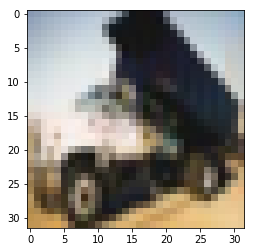

In [0]:
plt.imshow(X_test[random_image])

In [0]:
class_names[np.argmax(predictions[0])]

'camión'

## Paso 8: Enviar una petición POST a un modelo específico 

In [0]:
specific_json_response = requests.post(url="http://localhost:8000/v1/models/cifar10/versions/1:predict", data=data, headers=headers)

In [0]:
specific_json_response

<Response [200]>